In [1]:
import sys
sys.path.append("..")

In [2]:
from train_autoencoder import *
from test_autoencoder import *

In [3]:
from C2D_Models import *

In [4]:
models = [
    C2D_AE_144_3x3(channels = 1),
         ]

model_names = [
    "C2D_3x3_144_2xE",
]

model_names = [join_paths(["../models/C2D_AE_models/144/", mn+"_MSE_UCSD2"]) for mn in model_names]    

# Training

In [5]:
optimizers = [ADAM(m) for m in models]
losses = [MSE_LOSS() for m in models]

In [6]:
train_data = UCSD(2, image_size=144)

16it [00:02,  6.92it/s]


In [7]:
train_loader, val_loader = get_data_loaders(train_data, batch_size=96)

In [8]:
trainer = AutoEncoder_Trainer(
    models,
    model_names,
    train_loader, 
    val_loader,
    optimizers,
    losses,
    epochs = 300
)

Estimated Time 0.53 hours | Will be completed by 2020-11-21 09:22:
------------------------------------------------------------
Epoch: [001/300] | time/epoch: 6.37 seconds
------------------------------------------------------------
Model: ../models/C2D_AE_models/144/C2D_3x3_144_2xE_MSE_UCSD2/C2D_3x3_144_2xE_MSE_UCSD2.pth.tar
                Loss
Training    0.015937
Validation  0.011415
----------------------------------------
------------------------------------------------------------
Epoch: [002/300] | time/epoch: 6.36 seconds
------------------------------------------------------------
Model: ../models/C2D_AE_models/144/C2D_3x3_144_2xE_MSE_UCSD2/C2D_3x3_144_2xE_MSE_UCSD2.pth.tar
                Loss
Training    0.006395
Validation  0.004475
----------------------------------------
------------------------------------------------------------
Epoch: [003/300] | time/epoch: 6.38 seconds
------------------------------------------------------------
Model: ../models/C2D_AE_models/144/C2

['../models/C2D_AE_models/144/C2D_3x3_144_2xE_MSE_UCSD2']

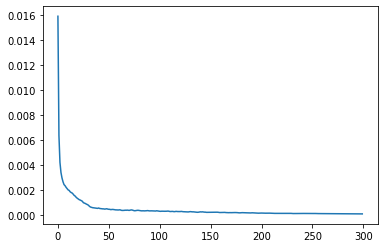

In [9]:
trainer.train()

In [10]:
for ae_model in trainer.autoencoder_models:
    save_model(ae_model.model, ae_model.model_file)

In [11]:
print("Training done")

Training done


# Testing

In [12]:
test_data = UCSD(2, image_size=144, isTrain=False, sample_stride = 1)

12it [00:01,  6.69it/s]


In [13]:
for ae_model in trainer.autoencoder_models:
    print("-"*40)
    print(ae_model.model_file)
    tester = AutoEncoder_Tester(
        ae_model.model,
        test_data,
    )
    results = tester.test(save_as = ".pkl".join(ae_model.model_file.split(".pth.tar")))
    print("="*40)

0it [00:00, ?it/s]

----------------------------------------
../models/C2D_AE_models/144/C2D_3x3_144_2xE_MSE_UCSD2/C2D_3x3_144_2xE_MSE_UCSD2.pth.tar


7it [00:18,  2.69s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


8it [00:21,  2.71s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


9it [00:23,  2.47s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


10it [00:25,  2.43s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


12it [00:31,  2.60s/it]


AUC-ROC Score of  OneClassSVM: 0.4003082071151814
-------------------- TEST RESULTS --------------------
{'agg_abs_reg_aucroc': 0.8243888693201832,
 'agg_sqr_reg_aucroc': 0.7981639661852765,
 'mean_abs_vid_aucroc': 0.9044034738682922,
 'mean_sqr_vid_aucroc': 0.8442040071618494,
 'overall_abs_aucroc': 0.6611324410003522,
 'overall_sqr_aucroc': 0.6512310672772104}


<Figure size 432x288 with 0 Axes>

In [14]:
try:
    del test_data
except:
    pass
test_data = UCSD(2, image_size=144, isTrain=False, sample_stride = 1, useCorrectedAnnotations = False)

12it [00:01,  6.99it/s]


In [15]:
for ae_model in trainer.autoencoder_models:
    print("-"*40)
    print(ae_model.model_file)
    tester = AutoEncoder_Tester(
        ae_model.model,
        test_data,
    )
    results = tester.test(save_as = ".pkl".join(ae_model.model_file.split(".pth.tar")))
    print("="*40)

0it [00:00, ?it/s]

----------------------------------------
../models/C2D_AE_models/144/C2D_3x3_144_2xE_MSE_UCSD2/C2D_3x3_144_2xE_MSE_UCSD2.pth.tar


7it [00:18,  2.71s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


8it [00:21,  2.73s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


9it [00:23,  2.49s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


10it [00:25,  2.44s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


12it [00:31,  2.61s/it]


AUC-ROC Score of  OneClassSVM: 0.41361368878399396
-------------------- TEST RESULTS --------------------
{'agg_abs_reg_aucroc': 0.8265434747626456,
 'agg_sqr_reg_aucroc': 0.8004688421927801,
 'mean_abs_vid_aucroc': 0.9072335596653349,
 'mean_sqr_vid_aucroc': 0.846327074800813,
 'overall_abs_aucroc': 0.6879224105562409,
 'overall_sqr_aucroc': 0.6748829989808507}


<Figure size 432x288 with 0 Axes>

In [16]:
exit()